## Homework 4

## Name: Aishwarya Donegiri

## USC ID: 4640782493

### (e) Model Trees on a highly imbalanced dataset using Weka

In [1]:
import pandas as pd
import numpy as np

In [2]:
import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'E:\\MS\\ML\\HW4\\env\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'E:\\MS\\ML\\HW4\\env\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'E:\\MS\\ML\\HW4\\env\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [13]:
import weka.core.converters as converters
from weka.classifiers import Classifier, Evaluation, Random
import weka.plot.classifiers as plt

In [7]:
train_dataset=converters.load_any_file("../data/aps_failure_training_set_imputed.csv")

In [17]:
test_dataset=converters.load_any_file("../data/aps_failure_testing_set_imputed.csv")

In [14]:
train_dataset.class_is_last()
classifier=Classifier('weka.classifiers.trees.LMT')
classifier.build_classifier(train_dataset)

evaluator=Evaluation(train_dataset)
evaluator.crossvalidate_model(classifier,train_dataset,5,Random(5))
train_error=evaluator.percent_incorrect
mae_train=evaluator.mean_absolute_error
con_matrix_train=evaluator.confusion_matrix
auc_train=evaluator.area_under_roc

In [29]:
print ("Train Accuracy : ",evaluator.percent_correct)
print ("Train Error : ",train_error)
print("Mean Absolute Error for train data : ",mae_train)
print ("Confusion matrix for train data : \n",con_matrix_train)
print ("AUC for train data :",auc_train(1))
print ("\nSummary : ")
print (evaluator.summary())

Train Accuracy :  99.19
Train Error :  0.81
Mean Absolute Error for train data :  0.011176786436484535
Confusion matrix for train data : 
 [[58845.   155.]
 [  331.   669.]]
AUC for train data : 0.9588666949152542

Summary : 

Correctly Classified Instances       59514               99.19   %
Incorrectly Classified Instances       486                0.81   %
Kappa statistic                          0.7295
Mean absolute error                      0.0112
Root mean squared error                  0.0815
Relative absolute error                 34.0784 %
Root relative squared error             63.689  %
Total Number of Instances            60000     



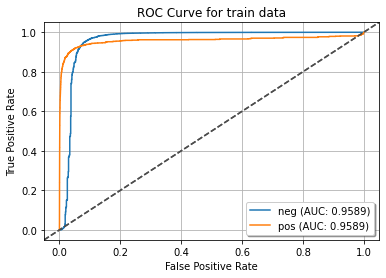

In [15]:
plt.plot_roc(evaluator,class_index=[0,1], title='ROC Curve for train data')

In [19]:
test_dataset.class_is_last()
evaluator_test=Evaluation(test_dataset)
evaluator_test.test_model(classifier,test_dataset)
test_error=evaluator_test.percent_incorrect
mae_test=evaluator_test.mean_absolute_error
con_matrix_test=evaluator_test.confusion_matrix
auc_test=evaluator_test.area_under_roc

In [30]:
print ("Test Accuracy : ",evaluator_test.percent_correct)
print ("Test Error : ",test_error)
print("Mean Absolute Error for test data : ",mae_test)
print ("Confusion matrix for test data : \n",con_matrix_test)
print ("AUC for test data :",auc_test(1))
print ("\nSummary : ")
print (evaluator_test.summary())

Test Accuracy :  99.0375
Test Error :  0.9625
Mean Absolute Error for test data :  0.012849947784907528
Confusion matrix for test data : 
 [[15581.    44.]
 [  110.   265.]]
AUC for test data : 0.9724542293333334

Summary : 

Correctly Classified Instances       15846               99.0375 %
Incorrectly Classified Instances       154                0.9625 %
Kappa statistic                          0.77  
Mean absolute error                      0.0128
Root mean squared error                  0.0878
Relative absolute error                 28.0364 %
Root relative squared error             58.0394 %
Total Number of Instances            16000     



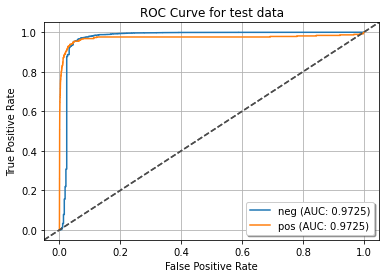

In [31]:
plt.plot_roc(evaluator_test,class_index=[0,1], title='ROC Curve for test data')